In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## ORB Detector

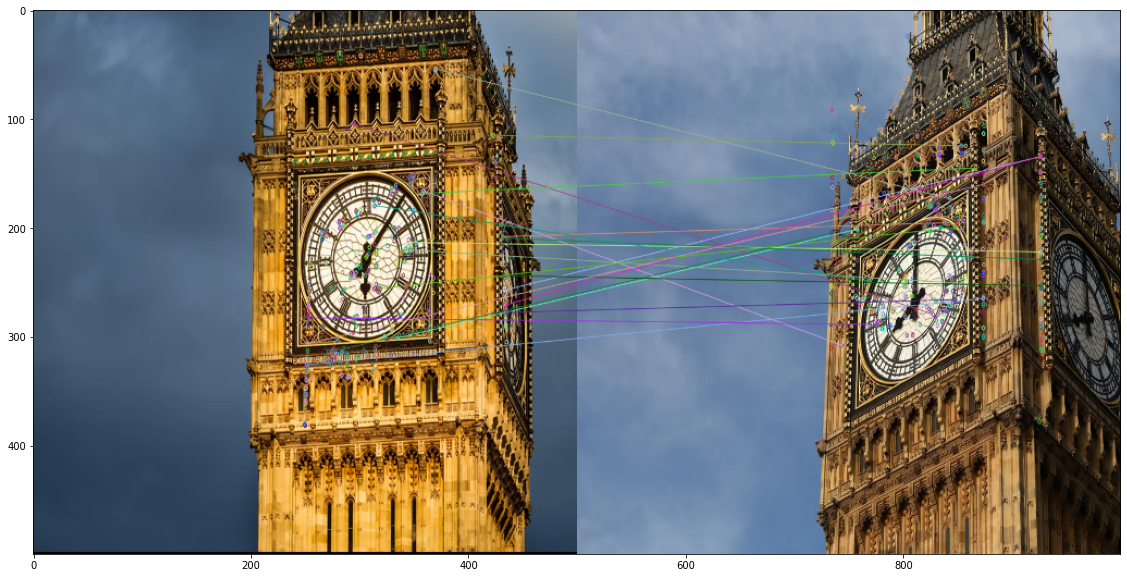

In [4]:
# Initialize the ORB detector algorithm
orb = cv.ORB_create()

# detect keypoints and descriptors
queryKeypoints, queryDescriptors = orb.detectAndCompute(gray_c2,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(gray_c1,None)
 
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

final_img = cv.drawMatches(c1, queryKeypoints,
c2, trainKeypoints, matches[:20],None)
  
final_img = cv.resize(final_img, (1000,500))
 
# Show the final image
plt.figure(figsize = (20, 10))
plt.imshow(final_img)
plt.show()

## RANSAC Algorithm


In [21]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(trainDescriptors.astype(np.float32),queryDescriptors.astype(np.float32),k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [22]:
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ queryKeypoints[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ trainKeypoints[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # calculate homography
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = gray_c1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(c2,[np.int32(dst)],True,255,3, cv.LINE_AA)

else:
    print ("Not enough matches are found")
    matchesMask = None

Not enough matches are found


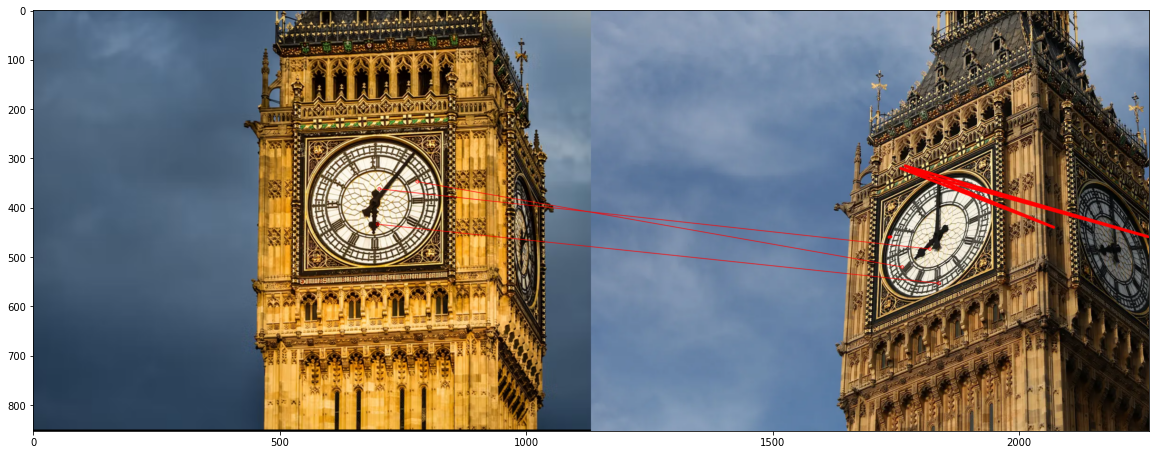

In [23]:
draw_params = dict(matchColor = (255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(c1,trainKeypoints,c2,queryKeypoints,good,None,**draw_params)

plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.show()

In [12]:
# homography matrix
M

array([[-8.80077295e-02, -1.05717206e+00,  6.03877837e+02],
       [-6.83687033e-02, -8.02620785e-01,  4.60176705e+02],
       [-1.48223512e-04, -1.74499193e-03,  1.00000000e+00]])